In [ ]:
import glob
from PIL import Image
import numpy as np

# torch
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (40,8)
%matplotlib inline

In [ ]:
import cv2
import os
import pydicom

ModuleNotFoundError: ignored

In [ ]:
# ! pip install pydicom

In [ ]:
def convert_dcm_to_image(dcm_file):
    ds = pydicom.read_file(dcm_file)
    shape = ds.pixel_array.shape

    # Convert to float to avoid overflow or underflow losses.
    image_2d = ds.pixel_array.astype(float)

    # Rescaling grey scale between 0-255
    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0

    # Convert to uint
    image_2d_scaled = np.uint8(image_2d_scaled)

    return image_2d_scaled

In [ ]:
dicom_files = glob.glob("dicom/*")
dicom_files.sort()
dicom_files

[]

In [ ]:
img_files = glob.glob("marked_images/*")
img_files.sort()
img_files

[]

In [ ]:
dicom_img = convert_dcm_to_image(dicom_files[0])
dicom_img

(512, 512)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
test_img = Image.fromarray(dicom_img)
test_img.save("img1.png","PNG")

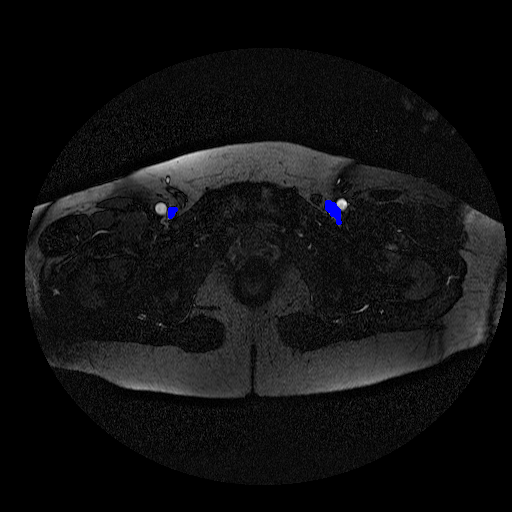

In [ ]:
Image.open(img_files[0])

In [ ]:
def create_mask_from_marked_image(image_path):
  # read image
  im = Image.open(image_path)
  im = im.convert('RGB')

  # convert image
  data = np.array(im)
  red, green, blue = data.T
  white_areas = (red == 0) & (blue == 255) & (green == 0)

  data[...][...] = (0, 0, 0) # Transpose back needed
  data[...][white_areas.T] = (255, 255, 255) # Transpose back needed

  return data

In [ ]:
mask_image = create_mask_from_marked_image(img_files[0])
mask_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

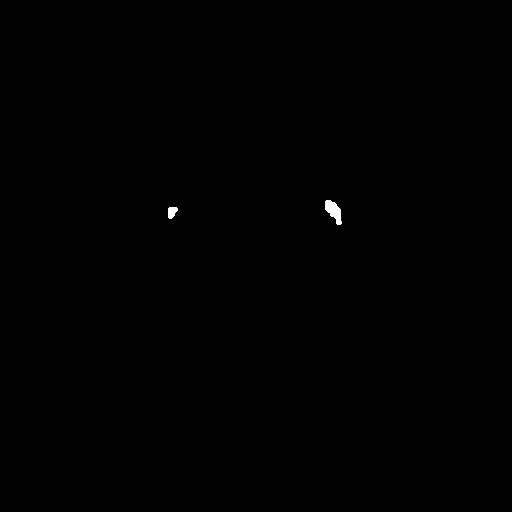

In [ ]:
Image.fromarray(mask_image)

In [ ]:
mask_image.shape

(512, 512, 3)

In [ ]:
dicom_img.shape

(512, 512)

# Preparing data

In [ ]:
!pwd

/content


In [ ]:
drive_dicom_files = glob.glob("drive/MyDrive/учеба/4 курс/Дипломная работа/segmentation_data/val/image/*")
len(drive_dicom_files)

176

In [ ]:
drive_manula_masks_files = glob.glob("drive/MyDrive/учеба/4 курс/Дипломная работа/segmentation_data/val/mask/*")
len(drive_manula_masks_files)

176

In [ ]:
drive_manula_masks_files = [v.split('.')[0] for v in drive_manula_masks_files]
drive_manula_masks_files = [v.split('/')[-1] for v in drive_manula_masks_files]
drive_manula_masks_files[:5]

['R15_IM000029',
 'R15_IM000028',
 'R15_IM000032',
 'R15_IM000027',
 'R15_IM000026']

In [ ]:
drive_dicom_files = [v.split('/')[-1] for v in drive_dicom_files]
drive_dicom_files = [v.split('.')[0] for v in drive_dicom_files]
drive_dicom_files[:5]

['R15_IM000029',
 'R15_IM000028',
 'R15_IM000032',
 'R15_IM000027',
 'R15_IM000026']

In [ ]:
set(drive_manula_masks_files) - set(drive_dicom_files)

set()

In [ ]:
dicom_dont_needed = set(drive_dicom_files) - set(drive_manula_masks_files)
dicom_dont_needed

set()

In [ ]:
# for f in dicom_dont_needed:
#     os.remove('drive/MyDrive/учеба/4 курс/Дипломная работа/segmentation_data/val/dicom/' + f)

In [ ]:
for filename in drive_dicom_files:
  # paths
  manual_mask_path = "drive/MyDrive/учеба/4 курс/Дипломная работа/segmentation_data/val/manual_masking/" + filename + ".png"
  dcm_path = "drive/MyDrive/учеба/4 курс/Дипломная работа/segmentation_data/val/dicom/" + filename

  Image.fromarray(create_mask_from_marked_image(manual_mask_path)).save('drive/MyDrive/учеба/4 курс/Дипломная работа/segmentation_data/val/mask/' + filename + '.png' , 'PNG')
  Image.fromarray(convert_dcm_to_image(dcm_path)).save('drive/MyDrive/учеба/4 курс/Дипломная работа/segmentation_data/val/image/' + filename + '.png' , 'PNG')


In [ ]:
drive_dicom_files = glob.glob("drive/MyDrive/учеба/4 курс/Дипломная работа/segmentation_data/val/image/*")
len(drive_dicom_files)

176

In [ ]:
drive_dicom_files = glob.glob("drive/MyDrive/учеба/4 курс/Дипломная работа/segmentation_data/val/mask/*")
len(drive_dicom_files)

176